In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt

In [21]:
# grab extracted data
os.path.exists('../Data_extraction/CarbonEmission.csv')
path = "../Data_extraction/CarbonEmission.csv"
data = pd.read_csv(path)
data

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


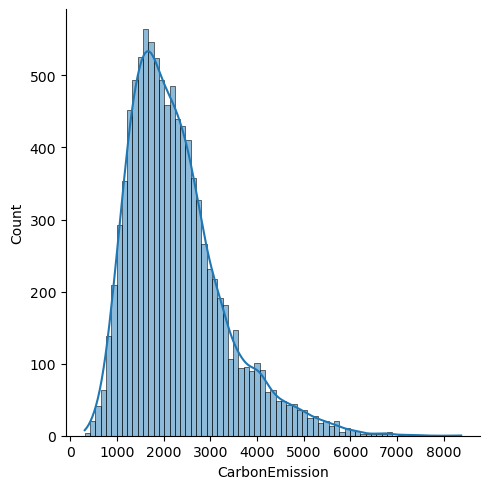

In [22]:
# plot distribution of carbon emissions
sns.displot(data=data['CarbonEmission'], kind='hist', kde=True)

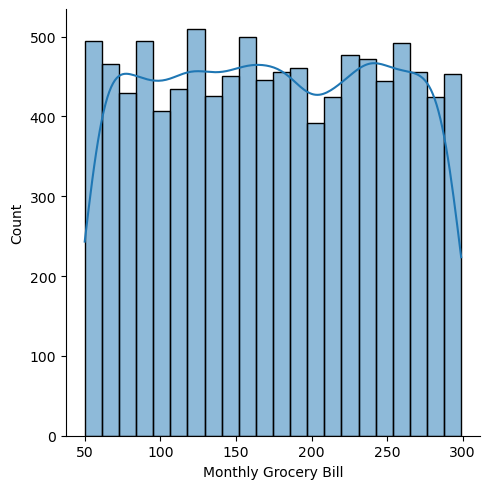

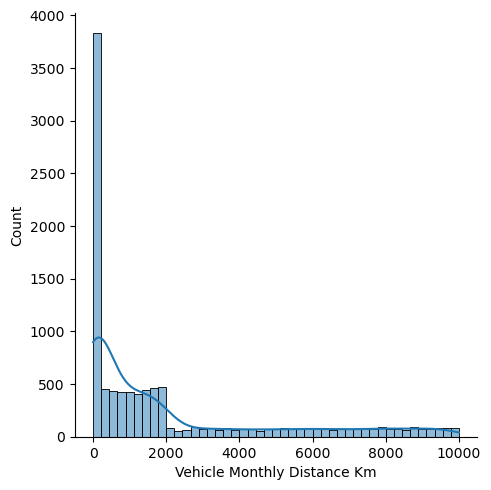

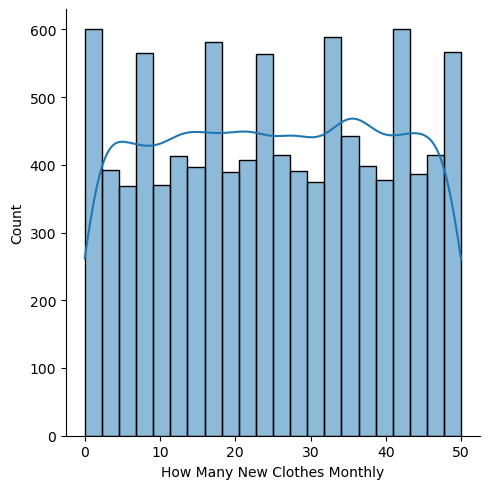

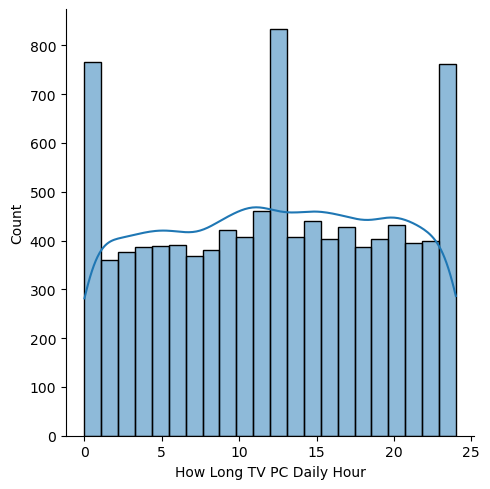

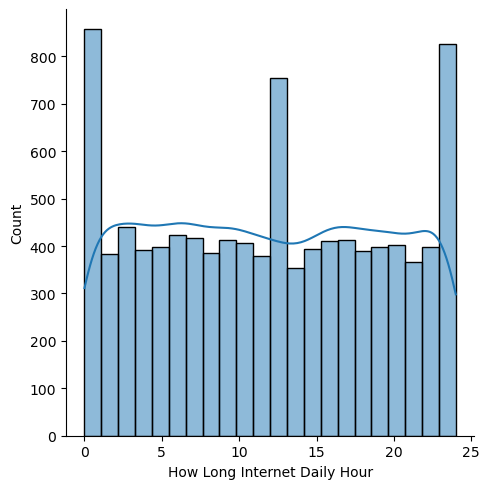

In [23]:
# plot distributions of numerical features
feature_columns = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'How Many New Clothes Monthly', 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour']
for c in feature_columns:
    d = data[c]
    sns.displot(data=d, kind='hist', kde=True)

In [24]:
# statistics of vehicle distance km
vehicle_distance = data['Vehicle Monthly Distance Km']
distance_min = vehicle_distance.min()
distance_max = vehicle_distance.max()
distance_mean = vehicle_distance.mean()
distance_median = vehicle_distance.median()

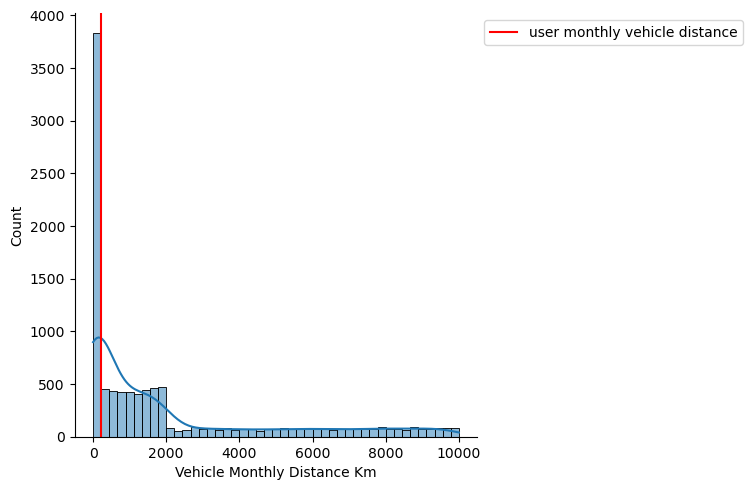

In [25]:
# example plot of user position in distribution
user_monthly_distance = np.random.randint(distance_min, distance_max)
sns.displot(data=vehicle_distance, kind='hist', kde=True)
plt.axvline(user_monthly_distance, label='user monthly vehicle distance', color='r', ls='-')
plt.legend(bbox_to_anchor=(1, 1), loc ='upper left')

In [26]:
# where the user stands
stats.percentileofscore(vehicle_distance, user_monthly_distance)

38.160000000000004

In [27]:
# correlations between all data
data_dir = '../Data_extraction/'
csv_file = 'extracted_data_v1.csv'
filepath = os.path.join(data_dir, csv_file)
extracted_data = pd.read_csv(filepath)
corr = extracted_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,coal,electricity,natural gas,wood,private,public,walk/bicycle,diesel,electric,hybrid,lpg,petrol,Vehicle Monthly Distance Km,Frequency of Traveling by Air,extra large waste bag,large waste bag,medium waste bag,small waste bag,Waste Bag Weekly Count,CarbonEmission
coal,1.000000,-0.340029,-0.331979,-0.332069,0.016532,-0.008855,-0.007583,0.014366,0.005252,-0.004675,0.010079,0.006329,0.014508,0.005956,-0.001994,-0.005318,0.002033,0.005269,-0.008915,0.128958
electricity,-0.340029,1.000000,-0.334531,-0.334621,-0.007232,0.004573,0.002624,-0.011144,-0.000219,0.007638,-0.005291,-0.004769,-0.001630,0.002872,-0.005297,0.005691,0.005653,-0.006008,0.000371,-0.132167
natural gas,-0.331979,-0.334531,1.000000,-0.326700,-0.013988,0.000502,0.013339,-0.006859,-0.002041,-0.008581,-0.001460,-0.007824,-0.016752,-0.021741,0.003485,-0.001472,0.011244,-0.013173,0.010431,-0.011807
wood,-0.332069,-0.334621,-0.326700,1.000000,0.004639,0.003796,-0.008348,0.003653,-0.003031,0.005563,-0.003346,0.006269,0.003774,0.012829,0.003886,0.001074,-0.019012,0.013940,-0.001818,0.015543
private,0.016532,-0.007232,-0.013988,0.004639,1.000000,-0.489535,-0.504346,0.368711,0.383964,0.374992,0.391878,0.376550,0.777946,0.007233,-0.000369,-0.003481,0.022104,-0.018116,-0.010881,0.488520
public,-0.008855,0.004573,0.000502,0.003796,-0.489535,1.000000,-0.506064,-0.180497,-0.187964,-0.183572,-0.191838,-0.184335,-0.255308,-0.002429,-0.012530,0.008927,-0.000461,0.004048,0.016674,-0.208929
walk/bicycle,-0.007583,0.002624,0.013339,-0.008348,-0.504346,-0.506064,1.000000,-0.185958,-0.193651,-0.189126,-0.197642,-0.189912,-0.516658,-0.004748,0.012773,-0.005397,-0.021407,0.013910,-0.005749,-0.276308
diesel,0.014366,-0.011144,-0.006859,0.003653,0.368711,-0.180497,-0.185958,1.000000,-0.069069,-0.067455,-0.070493,-0.067736,0.286564,0.021846,0.010040,0.004243,0.002991,-0.017207,-0.001519,0.243221
electric,0.005252,-0.000219,-0.002041,-0.003031,0.383964,-0.187964,-0.193651,-0.069069,1.000000,-0.070246,-0.073409,-0.070538,0.294403,-0.010451,0.006692,0.001092,0.010184,-0.017873,-0.009942,-0.101690
hybrid,-0.004675,0.007638,-0.008581,0.005563,0.374992,-0.183572,-0.189126,-0.067455,-0.070246,1.000000,-0.071694,-0.068889,0.287796,0.000617,-0.005182,-0.004300,0.016233,-0.006672,-0.000983,0.113084


/tmp/ipykernel_1592/1424796652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(correlations, x='features', y='correlations', palette='vlag')


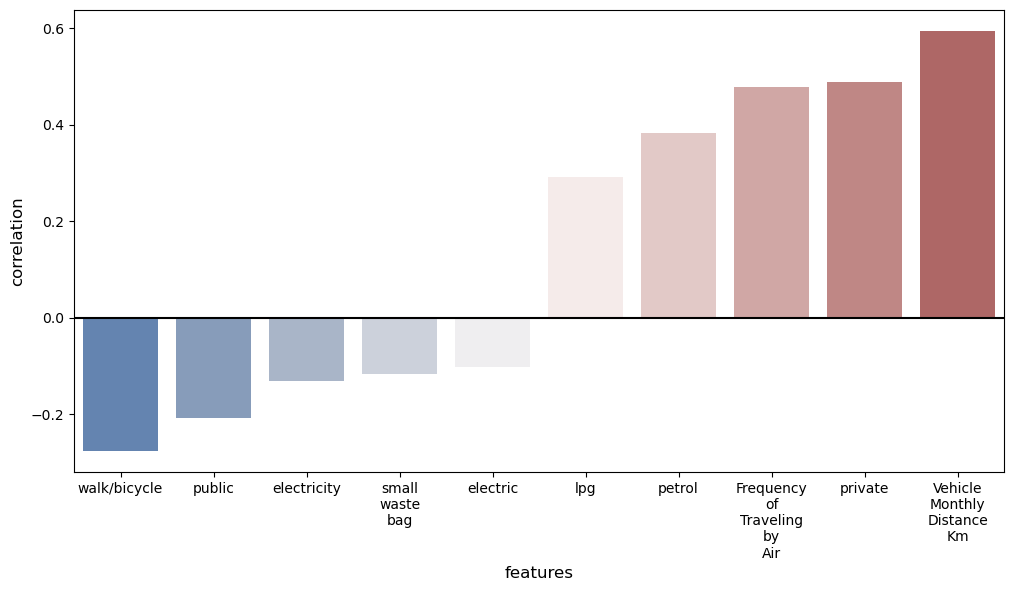

In [28]:
# plot the top 5 least and most correlated features with carbon emissions
ce_corr = corr['CarbonEmission']
ce_corr = ce_corr.drop('CarbonEmission')
k = ce_corr.keys()
v = ce_corr.values
ce_corr_sorted = sorted(list(zip(v,k)))
ce_corr_sorted = ce_corr_sorted[:5] + ce_corr_sorted[-5:]
sigma = [t[0] for t in ce_corr_sorted]
features = [t[1] for t in ce_corr_sorted]
features = [s.replace(' ', '\n') for s in features]
correlations = pd.DataFrame({'features': features, 'correlations': sigma})
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(correlations, x='features', y='correlations', palette='vlag')
ax.set_xlabel('features', fontsize=12)
ax.set_ylabel('correlation', fontsize=12)
ax.axhline(color='black')
plt.show()